In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def ReLU(preactivation):
    activation = preactivation.clip(0.0)
    return activation

In [4]:
def shallow_1_1_3(x, activation_fn, phi_0, phi_1, phi_2, phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
    pre_1 = theta_10 + theta_11 * x
    pre_2 = theta_20 + theta_21 * x
    pre_3 = theta_30 + theta_31 * x
    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)
    w_act_1 = phi_1 * act_1
    w_act_2 = phi_2 * act_2
    w_act_3 = phi_3 * act_3
    y = phi_0 + w_act_1 + w_act_2 + w_act_3
    return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [6]:
"""Shallow NN을 그리기 위함"""
def plot_neural(x, y):
    fig, ax = plt.subplots()
    ax.plot(x.T, y.T) # Transpose? 
    ax.set_xlabel('입력'); ax.set_ylabel('출력')
    ax.set_xlim([-1, 1]); ax.set_ylim([-1, 1])
    ax.set_aspect(1.0)
    plt.show()

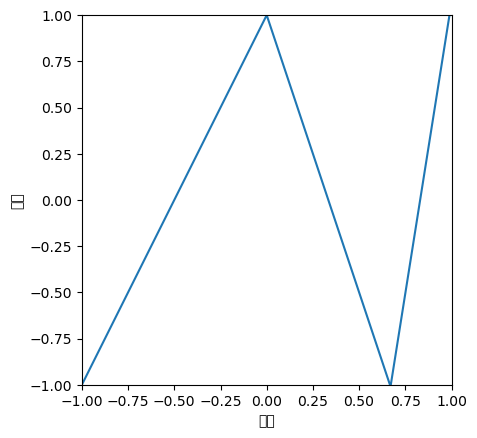

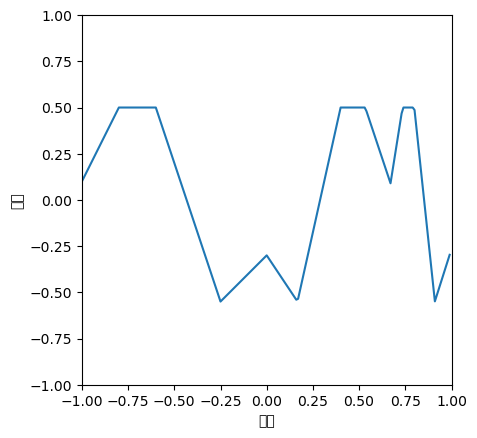

In [28]:
# Initialization (원래는 np.zeros(행,열) <= 여기다 대입하는게 좋음)
n1_theta_10 = 0.0; n1_theta_11 = -1.0
n1_theta_20 = 0; n1_theta_21 = 1.0
n1_theta_30 = -0.67; n1_theta_31 = 1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Input. Note : -1은 알아서 지정하라는 의미임!
n1_in = np.arange(-1, 1, 0.01).reshape([1, -1])

# Visualize Shallow NN
n1_out, *_ = shallow_1_1_3(n1_in, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural(n1_in, n1_out)
#######################################################

# TODO : Matrix Form
beta_0 = np.zeros((3, 1))
Omega_0 = np.zeros((3, 1))
beta_1 = np.zeros((1, 1))
Omega_1 = np.zeros((1, 3))
beta_0[0, 0] = n1_theta_10
beta_0[1, 0] = n1_theta_20
beta_0[2, 0] = n1_theta_30
Omega_0[0, 0] = n1_theta_11
Omega_0[1, 0] = n1_theta_21
Omega_0[2, 0] = n1_theta_31

n_data = n1_in.size # 200
n_dim_in = 1
n1_in_mat = np.reshape(n1_in,(n_dim_in,n_data)) # input [1x200]

# 행렬 형식을 이용한 신경망 실행

h1 = ReLU(np.matmul(beta_0, np.ones((1, n_data))) + np.matmul(Omega_0, n1_in_mat))
n1_out_mat = np.matmul(beta_1, np.ones((1, n_data))) + np.matmul(Omega_1, h1)

# plot_neural(n1_in, n1_out) # Checked!

# Second NN
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Define a range of input values
n2_in = np.arange(-1,1,0.01)

# We run the second neural network on the output of the first network
n2_out, *_ = \
    shallow_1_1_3(n1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# And then plot it
plot_neural(n1_in, n2_out)


# 더 깊은 신경망 정의 및 실행
# 무작위 파라미터를 이용하여 3개의 은닉층을 가진 깊은 신경망 정의 및 실행 코드 작성


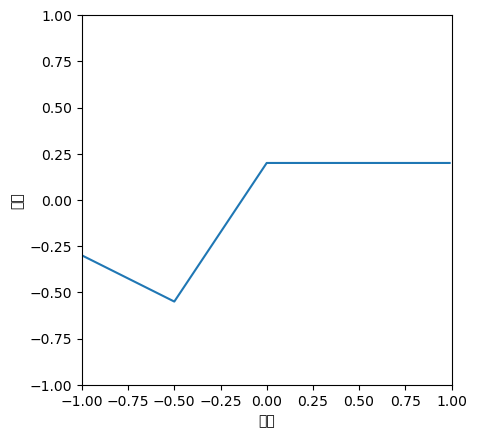

In [31]:
beta_0 = np.zeros((3,1))
Omega_0 = np.zeros((3,1))
beta_1 = np.zeros((3,1))
Omega_1 = np.zeros((3,3))
beta_2 = np.zeros((1,1))
Omega_2 = np.zeros((1,3))

# TODO Fill in the values of the beta and Omega matrices for the n1_theta, n1_phi, n2_theta, and n2_phi parameters
# that define the composition of the two networks above (see eqn 4.5 for Omega1 and beta1 albeit in different notation)
# !!! NOTE THAT MATRICES ARE CONVENTIONALLY INDEXED WITH a_11 IN THE TOP LEFT CORNER, BUT NDARRAYS START AT [0,0] SO EVERYTHING IS OFFSET
# To get you started I've filled in a few:
beta_0[0,0] = n1_theta_10
beta_0[1, 0] = n1_theta_20
beta_0[2, 0] = n1_theta_30
Omega_0[0,0] = n1_theta_11
Omega_0[1, 0] = n1_theta_21
Omega_0[2, 0] = n1_theta_31

beta_1[0,0] = n2_theta_10 
beta_1[1,0] = n2_theta_20 
beta_1[2,0] = n2_theta_30  
Omega_1[0,0] = n2_theta_11
Omega_1[1, 0] = n2_theta_21
Omega_1[2, 0] = n2_theta_31

beta_2[0,0] = n2_phi_0;
# Linear Combination with y라서 차원이 앞에 거랑 다름
Omega_2[0,0] = n2_phi_1
Omega_2[0,1] = n2_phi_2
Omega_2[0,2] = n2_phi_3

# Make sure that input data matrix has different inputs in its columns
n_data = n1_in.size
n_dim_in = 1
n1_in_mat = np.reshape(n1_in,(n_dim_in,n_data))

# This runs the network for ALL of the inputs, x at once so we can draw graph (hence extra np.ones term)
h1 = ReLU(np.matmul(beta_0, np.ones((1,n_data))) + np.matmul(Omega_0,n1_in_mat))
h2 = ReLU(np.matmul(beta_1, np.ones((1,n_data))) + np.matmul(Omega_1,h1))
n1_out = np.matmul(beta_2, np.ones((1,n_data))) + np.matmul(Omega_2,h2)
# 행렬곱시 보존되는 차원 = n, 변하는건 d => n_1 => n_2(Feature)

# Draw the network and check that it looks the same as the non-matrix version
plot_neural(n1_in, n1_out)

In [34]:
# define sizes
D_i=4; D_1=5; D_2=2; D_3=4; D_o=1
# We'll choose the inputs and parameters of this network randomly using np.random.normal
# For example, we'll set the input using
n_data = 4;
x = np.random.normal(size=(D_i, n_data)) # n이 보존
# TODO initialize the parameters randomly with the correct sizes
# Replace the lines below
beta_0 = np.random.normal(size=(5,1))
Omega_0 = np.random.normal(size=(5,4))
beta_1 = np.random.normal(size=(2,1))
Omega_1 = np.random.normal(size=(2,5))
beta_2 = np.random.normal(size=(4,1))
Omega_2 = np.random.normal(size=(4,2))
beta_3 = np.random.normal(size=(1,1))
Omega_3 = np.random.normal(size=(1,4))

"""결론 : 
Bias Vector는 (다음 layer units, 1)로 선언
W matrix는 (다음 layer units, 이전 layer units)로 선언
보존되는 것 : Input의 개수 n
변하는 것 : Input의 차원 d => n_1 => n_2 ....

이걸 알면 당연한 것
# Layer 별 Bias vector : beta_0(다음 unit 개수,1) * np, ones((1,열(Input의 개수 n))) : n은 보존되고 unit 개수가 변함
(n_1 x n) => (n_2 x n) ... 

# np.ones(shape, dtype)라서 shape에 tuple 형태가 들어가야 함
# np.matmul과 np.dot의 차이? 
2차원(matrix)까지는 동일
Tensor부터는 np.matmul을 이용해야 원하는 텐서곱을 얻어낼 수 있다. 
"""

# If you set the parameters to the correct sizes, the following code will run
h1 = ReLU(np.matmul(beta_0,np.ones((1,n_data))) + np.matmul(Omega_0,x));
h2 = ReLU(np.matmul(beta_1,np.ones((1,n_data))) + np.matmul(Omega_1,h1));
h3 = ReLU(np.matmul(beta_2,np.ones((1,n_data))) + np.matmul(Omega_2,h2));
y = np.matmul(beta_3,np.ones((1,n_data))) + np.matmul(Omega_3,h3)

if h1.shape[0] is not D_1 or h1.shape[1] is not n_data:
  print("h1 is wrong shape")
if h2.shape[0] is not D_2 or h1.shape[1] is not n_data:
  print("h2 is wrong shape")
if h3.shape[0] is not D_3 or h1.shape[1] is not n_data:
  print("h3 is wrong shape")
if y.shape[0] is not D_o or h1.shape[1] is not n_data:
  print("Output is wrong shape")

# Print the inputs and outputs
print("Input data points")
print(x)
print ("Output data points")
print(y)

Input data points
[[-0.26548932  0.04059953 -0.84183252 -0.65476921]
 [-2.19555559  1.2744859   0.72074017 -0.72988653]
 [-0.85820278  0.40107942  0.07907758 -1.00503558]
 [ 0.46121352  0.19329337  2.45748805 -1.26356017]]
Output data points
[[-0.15392872  0.43381858 -0.20242049  0.27451377]]
